# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

def loadData():
    with np.load('notMNIST.npz') as data:
        Data, Target = data['images'], data['labels']
        posClass = 2
        negClass = 9

        # target == 2 or 9
        dataIndx = (Target == posClass) + (Target == negClass)

        # data normalization 0-1
        Data = Data[dataIndx]/255.
        # one column
        Target = Target[dataIndx].reshape(-1, 1)

        Target[Target == posClass] = 1
        Target[Target == negClass] = 0

        np.random.seed(421)
        # arrange the index
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)

        Data, Target = Data[randIndx], Target[randIndx]

        # 3500 training images
        trainData, trainTarget = Data[:3500], Target[:3500]
        # 100 validation images
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        # 145 test images
        testData, testTarget = Data[3600:], Target[3600:]

    return trainData, validData, testData, trainTarget, validTarget, testTarget

# 1. Linear Regression

In [2]:
W = np.zeros([28*28,  1])
b = 0
reg = 0

# tranining data
trainTarget = loadData()[3]
n_train = len(trainTarget)
trainData = np.reshape(loadData()[0], [n_train, -1])

# validation data
validTarget = loadData()[4]
n_valid = len(validTarget)
validData = np.reshape(loadData()[1], [n_valid, -1])

# test data
testTarget = loadData()[5]
n_test = len(testTarget)
testData = np.reshape(loadData()[2], [n_test, -1])

# 1) loss function and gradient

In [3]:
 # 1) loss function and gradient
def MSE(W, b, x, y, reg):
    n_training_samples = len(y)
    y_head = np.dot(x, W)+b
    error = np.sum(np.square(y-y_head))/(2*n_training_samples) + np.sum(np.square(W))*reg/2
    return error

In [4]:
def gradMSE(W, b, x, y, reg):
    n_training_samples = len(y)
    y_head = np.dot(x, W)+b
    grad_MSE_w = (1.0/n_training_samples)*np.dot(x.T, (y_head-y))+reg*W
    grad_MSE_b = (1.0/n_training_samples)*np.sum(y_head-y)
    return grad_MSE_w,grad_MSE_b


# 2) gradient descent implementation

In [36]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, EPS, lossType="None"):
    epoch_set = []
    
    trainError_set = []
    trainAccuracy_set = []
    
    validError_set = []
    validAccuracy_set = []
    
    testError_set = []
    testAccuracy_set = []
    
    if lossType == "MSE":
        start_time = time.time()
        
        for epoch in range(epochs+1):
            
            
            w_gradient = gradMSE(W, b, x, y, reg)[0]
            b_gradient = gradMSE(W, b, x, y, reg)[1]
        
            w_current = W - (alpha * w_gradient)
            b_current = b - (alpha * b_gradient)
        
            time1 = time.time()

            if np.sum(abs(w_current - W)) <= error_tol:
                print("Converged.")
                break
            
            
            if epoch % 500 == 0 and epoch != 0:
                epoch_set.append(epoch)
                
                errorTrain = MSE(W, b, x, y, reg)
                errorValid = MSE(W, b, validData, validTarget, reg)
                errorTest = MSE(W, b, testData, testTarget, reg)
                
                y_hatTrain = np.dot(x,w_current) + b_current
                y_hatValid = np.dot(validData,w_current) + b_current
                y_hatTest = np.dot(testData,w_current) + b_current
                
                n = 0
                for i in range(len(y_hatTrain)):
                    if 0.5<=y_hatTrain[i]:
                        y_hatTrain[i] = 1
                    elif y_hatTrain[i]<0.5:
                        y_hatTrain[i] = 0

                    if y_hatTrain[i] == y[i]:
                        n = n + 1
            
                trainAccuracy = n/len(y)
                
                n = 0
                for i in range(len(y_hatValid)):
                    if 0.5<=y_hatValid[i]:
                        y_hatValid[i] = 1
                    elif y_hatValid[i]<0.5:
                        y_hatValid[i] = 0

                    if y_hatValid[i] == validTarget[i]:
                        n = n + 1
            
                validAccuracy = n/len(validTarget)
                
                n = 0
                for i in range(len(y_hatTest)):
                    if 0.5<=y_hatTest[i]:
                        y_hatTest[i] = 1
                    elif y_hatTest[i]<0.5:
                        y_hatTest[i] = 0

                    if y_hatTest[i] == testTarget[i]:
                        n = n + 1
            
                testAccuracy = n/len(testTarget)            
                
                
                print("Iteration: %d - TrainError: %.4f - TrainAccuracy: %.4f" %(epoch, errorTrain,trainAccuracy))
                print("Iteration: %d - ValidError: %.4f - ValidAccuracy: %.4f" %(epoch, errorValid,validAccuracy))
                print("Iteration: %d - TestError: %.4f - TestAccuracy: %.4f" %(epoch, errorTest,testAccuracy))
                
                trainError_set.append(errorTrain)
                validError_set.append(errorValid)
                testError_set.append(errorTest)
                
                trainAccuracy_set.append(trainAccuracy)
                validAccuracy_set.append(validAccuracy)
                testAccuracy_set.append(testAccuracy)
                
        
                time2 = time.time()    
                training_time = time.time() - start_time-(time2-time1)
            
                print("TrainingTime: %.4f" %(training_time))
        
            W = w_current
            b = b_current
            
        return w_current,b_current, trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set, testAccuracy_set,training_time,epoch_set
    
        
    elif lossType == "CE":
        for epoch in range(epochs+1):
        
            w_gradient = gradCE(W, b, x, y, reg)[0]
            b_gradient = gradCE(W, b, x, y, reg)[1]
        
        
            w_current = W - (alpha * w_gradient)
            b_current = b - (alpha * b_gradient)

            n = 0
            if epoch % 500 == 0 and epoch != 0:
                epoch_set.append(epoch)
                
                errorTrain = crossEntropyLoss(W, b, x, y, reg, EPS)
                errorValid = crossEntropyLoss(W, b, validData, validTarget, reg, EPS)
                errorTest = crossEntropyLoss(W, b, testData, testTarget, reg, EPS)
                
                y_hatTrain = np.dot(x,w_current) + b_current
                y_hatValid = np.dot(validData,w_current) + b_current
                y_hatTest = np.dot(testData,w_current) + b_current
                
                n = 0
                for i in range(len(y_hatTrain)):
                    if 0.5<=y_hatTrain[i]:
                        y_hatTrain[i] = 1
                    elif y_hatTrain[i]<0.5:
                        y_hatTrain[i] = 0

                    if y_hatTrain[i] == y[i]:
                        n = n + 1
            
                trainAccuracy = n/len(y)
                
                n = 0
                for i in range(len(y_hatValid)):
                    if 0.5<=y_hatValid[i]:
                        y_hatValid[i] = 1
                    elif y_hatValid[i]<0.5:
                        y_hatValid[i] = 0

                    if y_hatValid[i] == validTarget[i]:
                        n = n + 1
            
                validAccuracy = n/len(validTarget)
                
                n = 0
                for i in range(len(y_hatTest)):
                    if 0.5<=y_hatTest[i]:
                        y_hatTest[i] = 1
                    elif y_hatTest[i]<0.5:
                        y_hatTest[i] = 0

                    if y_hatTest[i] == testTarget[i]:
                        n = n + 1
            
                testAccuracy = n/len(testTarget)            
                
                
                print("Iteration: %d - TrainError: %.4f - TrainAccuracy: %.4f" %(epoch, errorTrain,trainAccuracy))
                print("Iteration: %d - ValidError: %.4f - ValidAccuracy: %.4f" %(epoch, errorValid,validAccuracy))
                print("Iteration: %d - TestError: %.4f - TestAccuracy: %.4f" %(epoch, errorTest,testAccuracy))
                
                trainError_set.append(errorTrain)
                validError_set.append(errorValid)
                testError_set.append(errorTest)
                
                trainAccuracy_set.append(trainAccuracy)
                validAccuracy_set.append(validAccuracy)
                testAccuracy_set.append(testAccuracy)
                
            W = w_current
            b = b_current
        
        return w_current,b_current, trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,epoch_set
    
    

# 3) tunning the learning rate

In [37]:
epochs = 5000
error_tol = 10**-7
alpha1 = 0.005
alpha2 = 0.001
alpha3 = 0.0001
EPS = 10**-7

learning rate = 0.005
Iteration: 500 - TrainError: 0.0188 - TrainAccuracy: 0.9591
Iteration: 500 - ValidError: 0.0210 - ValidAccuracy: 0.9700
Iteration: 500 - TestError: 0.0209 - TestAccuracy: 0.9586
TrainingTime: 1.2567
Iteration: 1000 - TrainError: 0.0172 - TrainAccuracy: 0.9631
Iteration: 1000 - ValidError: 0.0193 - ValidAccuracy: 0.9700
Iteration: 1000 - TestError: 0.0196 - TestAccuracy: 0.9586
TrainingTime: 2.2911
Iteration: 1500 - TrainError: 0.0162 - TrainAccuracy: 0.9657
Iteration: 1500 - ValidError: 0.0182 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0188 - TestAccuracy: 0.9586
TrainingTime: 3.2651
Iteration: 2000 - TrainError: 0.0155 - TrainAccuracy: 0.9686
Iteration: 2000 - ValidError: 0.0175 - ValidAccuracy: 0.9800
Iteration: 2000 - TestError: 0.0183 - TestAccuracy: 0.9586
TrainingTime: 4.2383
Iteration: 2500 - TrainError: 0.0150 - TrainAccuracy: 0.9714
Iteration: 2500 - ValidError: 0.0170 - ValidAccuracy: 0.9800
Iteration: 2500 - TestError: 0.0180 - TestAccuracy:

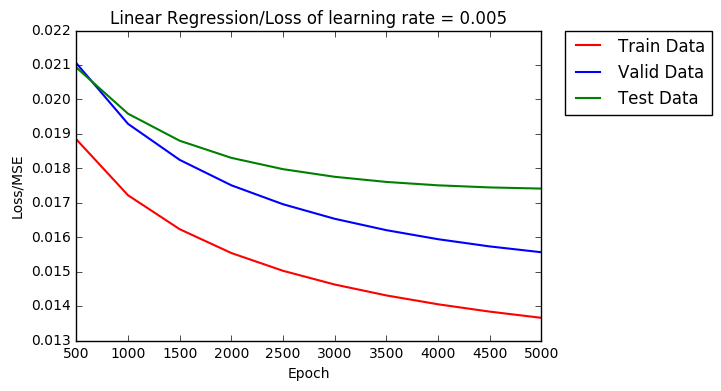

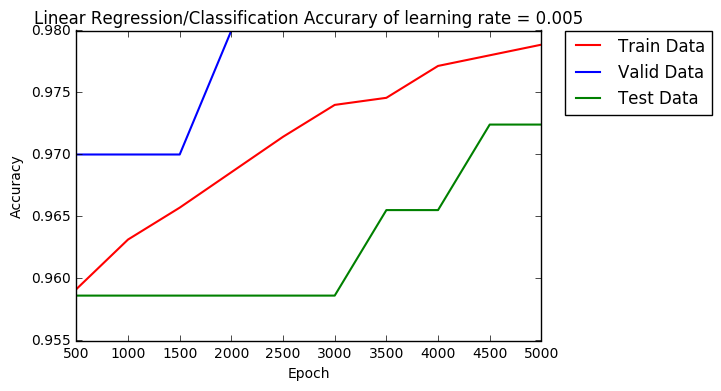

In [38]:
lossType = "MSE"
print("learning rate = 0.005")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha1, epochs, reg, error_tol,EPS, lossType)[2:]
    
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"learning rate = 0.005") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "learning rate = 0.005")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

learning rate = 0.001
Iteration: 500 - TrainError: 0.0231 - TrainAccuracy: 0.9474
Iteration: 500 - ValidError: 0.0263 - ValidAccuracy: 0.9300
Iteration: 500 - TestError: 0.0236 - TestAccuracy: 0.9517
TrainingTime: 1.2472
Iteration: 1000 - TrainError: 0.0210 - TrainAccuracy: 0.9526
Iteration: 1000 - ValidError: 0.0238 - ValidAccuracy: 0.9500
Iteration: 1000 - TestError: 0.0224 - TestAccuracy: 0.9448
TrainingTime: 2.3698
Iteration: 1500 - TrainError: 0.0200 - TrainAccuracy: 0.9554
Iteration: 1500 - ValidError: 0.0225 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0218 - TestAccuracy: 0.9517
TrainingTime: 3.4394
Iteration: 2000 - TrainError: 0.0194 - TrainAccuracy: 0.9571
Iteration: 2000 - ValidError: 0.0217 - ValidAccuracy: 0.9700
Iteration: 2000 - TestError: 0.0213 - TestAccuracy: 0.9586
TrainingTime: 4.4104
Iteration: 2500 - TrainError: 0.0188 - TrainAccuracy: 0.9591
Iteration: 2500 - ValidError: 0.0210 - ValidAccuracy: 0.9700
Iteration: 2500 - TestError: 0.0209 - TestAccuracy:

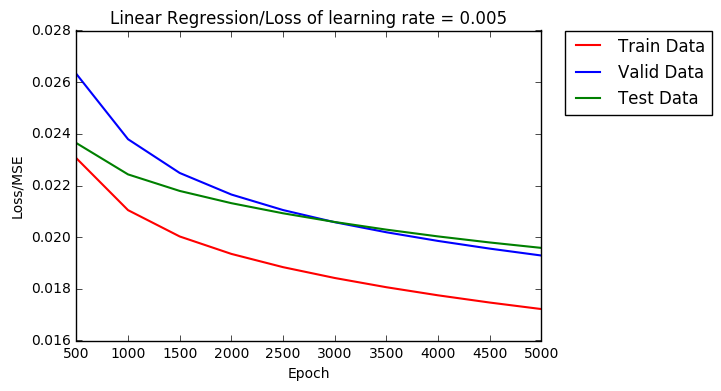

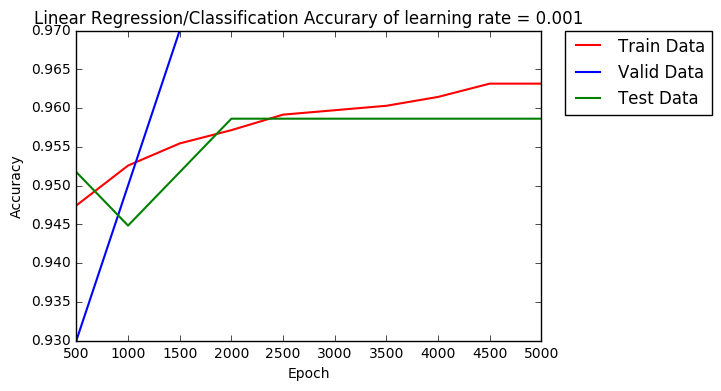

In [41]:
lossType = "MSE"
print("learning rate = 0.001")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha2, epochs, reg, error_tol,EPS, lossType)[2:]
    
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"learning rate = 0.005") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "learning rate = 0.001")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

learning rate = 0.0001
Iteration: 500 - TrainError: 0.0336 - TrainAccuracy: 0.9251
Iteration: 500 - ValidError: 0.0398 - ValidAccuracy: 0.9000
Iteration: 500 - TestError: 0.0325 - TestAccuracy: 0.9379
TrainingTime: 1.2299
Iteration: 1000 - TrainError: 0.0285 - TrainAccuracy: 0.9346
Iteration: 1000 - ValidError: 0.0332 - ValidAccuracy: 0.9000
Iteration: 1000 - TestError: 0.0279 - TestAccuracy: 0.9517
TrainingTime: 2.2856
Iteration: 1500 - TrainError: 0.0270 - TrainAccuracy: 0.9380
Iteration: 1500 - ValidError: 0.0313 - ValidAccuracy: 0.9000
Iteration: 1500 - TestError: 0.0266 - TestAccuracy: 0.9448
TrainingTime: 3.2627
Iteration: 2000 - TrainError: 0.0260 - TrainAccuracy: 0.9397
Iteration: 2000 - ValidError: 0.0300 - ValidAccuracy: 0.9200
Iteration: 2000 - TestError: 0.0258 - TestAccuracy: 0.9448
TrainingTime: 4.2374
Iteration: 2500 - TrainError: 0.0253 - TrainAccuracy: 0.9414
Iteration: 2500 - ValidError: 0.0291 - ValidAccuracy: 0.9200
Iteration: 2500 - TestError: 0.0252 - TestAccuracy

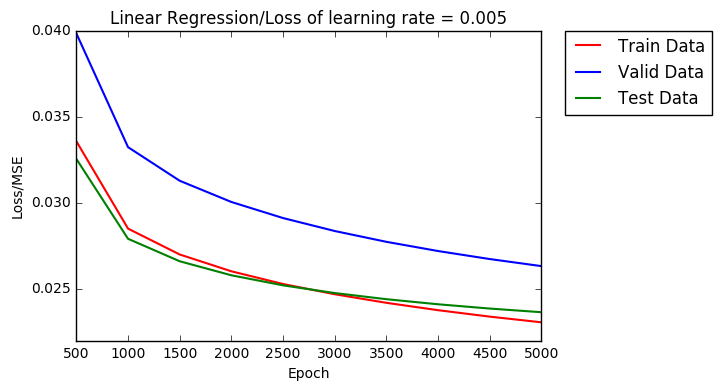

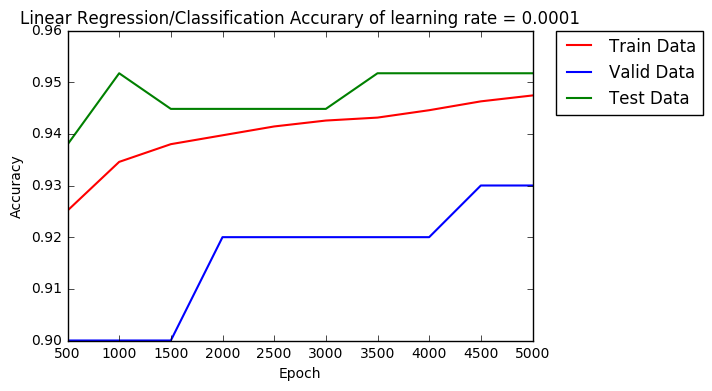

In [40]:
lossType = "MSE"
print("learning rate = 0.0001")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha3, epochs, reg, error_tol,EPS, lossType)[2:]
    
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"learning rate = 0.005") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "learning rate = 0.0001")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

# 4) Generalization-different lamda

In [14]:
def plot_different_reg(W,b,x,y,reg1,reg2,reg3,alpha_generalization,title,error_tol,EPS):
    lossType = "MSE"
    print("lambda = 0.001")
    train_error1,train_accuracy1,training_time1,epoch_set = grad_descent(W, b, x, y, alpha_generalization, epochs, reg1, error_tol,EPS, lossType)[2:]
    print('training_time = ')
    print(training_time1)
    print('----------')

    print("lambda = 0.1")
    train_error2,train_accuracy2,training_time2,epoch_set = grad_descent(W, b, x, y, alpha_generalization, epochs, reg2, error_tol,EPS, lossType)[2:]
    print('training_time = ')
    print(training_time2)
    print('----------')
    
    print("lambda = 0.5")
    train_error3,train_accuracy3,training_time3,epoch_set = grad_descent(W,b, x, y, alpha_generalization, epochs, reg3, error_tol,EPS, lossType)[2:]
    print('training_time = ')
    print(training_time3)
    
    fig = plt.figure()

    plt.xlabel("Epoch")
    plt.ylabel("Loss/MSE")

    plt.plot(epoch_set,train_error1,color='red', linewidth=1.5,label="reg1=0.001")
    plt.plot(epoch_set,train_error2,color='blue', linewidth=1.5,label="reg2=0.1")
    plt.plot(epoch_set,train_error3,color='green', linewidth=1.5,label="reg3=0.5")

    plt.title('Linear Regression/Loss of '+title+ ' for Different reg')
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()
    
    plt.plot(epoch_set,train_accuracy1,color='red', linewidth=1.5,label="reg1=0.001")
    plt.plot(epoch_set,train_accuracy2,color='blue', linewidth=1.5,label="reg2=0.1")
    plt.plot(epoch_set,train_accuracy3,color='green', linewidth=1.5,label="reg3=0.5")

    plt.title('Linear Regression/Classification Accuracy of '+title+ ' for Different reg')
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()

In [15]:
reg1 = 0.001
reg2 = 0.1
reg3 = 0.5

alpha_generalization = 0.005

learning lambda = 0.001
Iteration: 500 - TrainError: 0.0189 - TrainAccuracy: 0.9591
Iteration: 500 - ValidError: 0.0211 - ValidAccuracy: 0.9700
Iteration: 500 - TestError: 0.0209 - TestAccuracy: 0.9586
TrainingTime: 1.1537
Iteration: 1000 - TrainError: 0.0172 - TrainAccuracy: 0.9631
Iteration: 1000 - ValidError: 0.0193 - ValidAccuracy: 0.9700
Iteration: 1000 - TestError: 0.0196 - TestAccuracy: 0.9586
TrainingTime: 2.1703
Iteration: 1500 - TrainError: 0.0163 - TrainAccuracy: 0.9657
Iteration: 1500 - ValidError: 0.0183 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0188 - TestAccuracy: 0.9586
TrainingTime: 3.1307
Iteration: 2000 - TrainError: 0.0156 - TrainAccuracy: 0.9686
Iteration: 2000 - ValidError: 0.0175 - ValidAccuracy: 0.9700
Iteration: 2000 - TestError: 0.0183 - TestAccuracy: 0.9586
TrainingTime: 4.0874
Iteration: 2500 - TrainError: 0.0151 - TrainAccuracy: 0.9714
Iteration: 2500 - ValidError: 0.0170 - ValidAccuracy: 0.9800
Iteration: 2500 - TestError: 0.0180 - TestAccurac

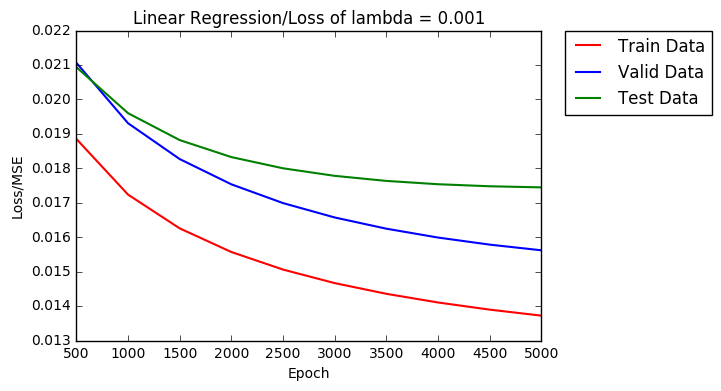

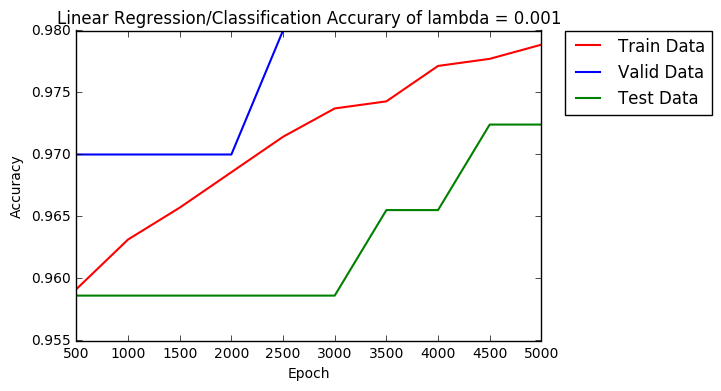

In [42]:
lossType = "MSE"
print("learning lambda = 0.001")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha_generalization, epochs, reg1, error_tol,EPS, lossType)[2:]
    
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"lambda = 0.001") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "lambda = 0.001")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

learning lambda = 0.1
Iteration: 500 - TrainError: 0.0201 - TrainAccuracy: 0.9574
Iteration: 500 - ValidError: 0.0224 - ValidAccuracy: 0.9700
Iteration: 500 - TestError: 0.0219 - TestAccuracy: 0.9586
TrainingTime: 1.1771
Iteration: 1000 - TrainError: 0.0188 - TrainAccuracy: 0.9620
Iteration: 1000 - ValidError: 0.0209 - ValidAccuracy: 0.9700
Iteration: 1000 - TestError: 0.0209 - TestAccuracy: 0.9586
TrainingTime: 2.2435
Iteration: 1500 - TrainError: 0.0181 - TrainAccuracy: 0.9646
Iteration: 1500 - ValidError: 0.0201 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0202 - TestAccuracy: 0.9586
TrainingTime: 3.4308
Iteration: 2000 - TrainError: 0.0177 - TrainAccuracy: 0.9671
Iteration: 2000 - ValidError: 0.0196 - ValidAccuracy: 0.9700
Iteration: 2000 - TestError: 0.0198 - TestAccuracy: 0.9586
TrainingTime: 4.5133
Iteration: 2500 - TrainError: 0.0174 - TrainAccuracy: 0.9689
Iteration: 2500 - ValidError: 0.0192 - ValidAccuracy: 0.9700
Iteration: 2500 - TestError: 0.0195 - TestAccuracy:

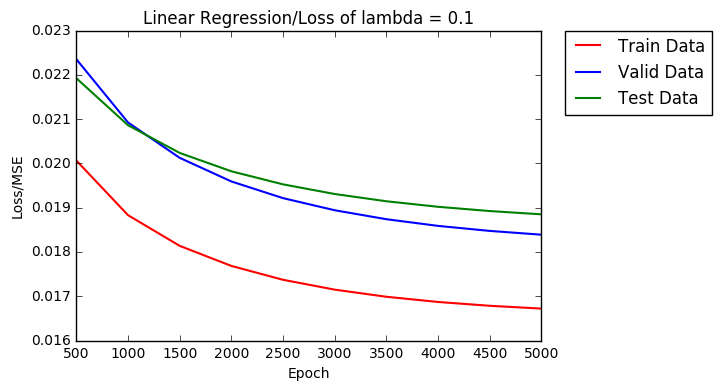

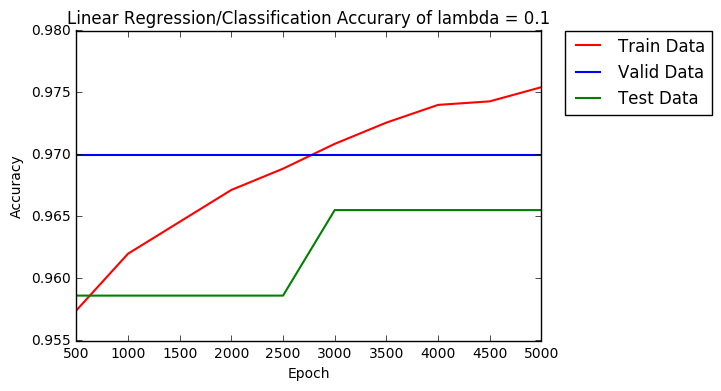

In [43]:
lossType = "MSE"
print("learning lambda = 0.1")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha_generalization, epochs, reg2, error_tol,EPS, lossType)[2:]
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"lambda = 0.1") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "lambda = 0.1")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

learning lambda = 0.5
Iteration: 500 - TrainError: 0.0236 - TrainAccuracy: 0.9551
Iteration: 500 - ValidError: 0.0263 - ValidAccuracy: 0.9600
Iteration: 500 - TestError: 0.0248 - TestAccuracy: 0.9517
TrainingTime: 1.0926
Iteration: 1000 - TrainError: 0.0226 - TrainAccuracy: 0.9586
Iteration: 1000 - ValidError: 0.0250 - ValidAccuracy: 0.9700
Iteration: 1000 - TestError: 0.0237 - TestAccuracy: 0.9586
TrainingTime: 2.2898
Iteration: 1500 - TrainError: 0.0218 - TrainAccuracy: 0.9609
Iteration: 1500 - ValidError: 0.0242 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0229 - TestAccuracy: 0.9655
TrainingTime: 3.3343
Iteration: 2000 - TrainError: 0.0214 - TrainAccuracy: 0.9631
Iteration: 2000 - ValidError: 0.0236 - ValidAccuracy: 0.9700
Iteration: 2000 - TestError: 0.0224 - TestAccuracy: 0.9655
TrainingTime: 4.3410
Iteration: 2500 - TrainError: 0.0210 - TrainAccuracy: 0.9649
Iteration: 2500 - ValidError: 0.0232 - ValidAccuracy: 0.9700
Iteration: 2500 - TestError: 0.0220 - TestAccuracy:

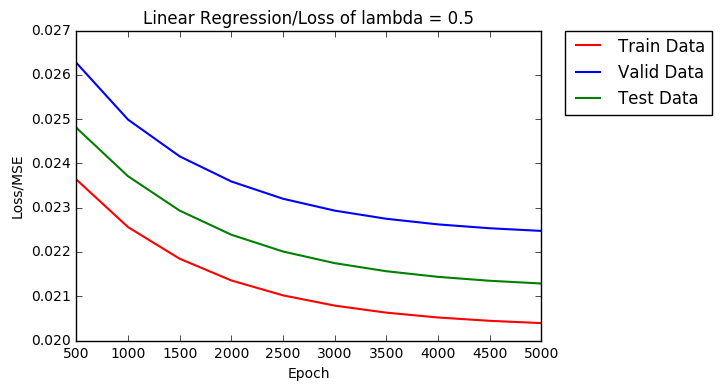

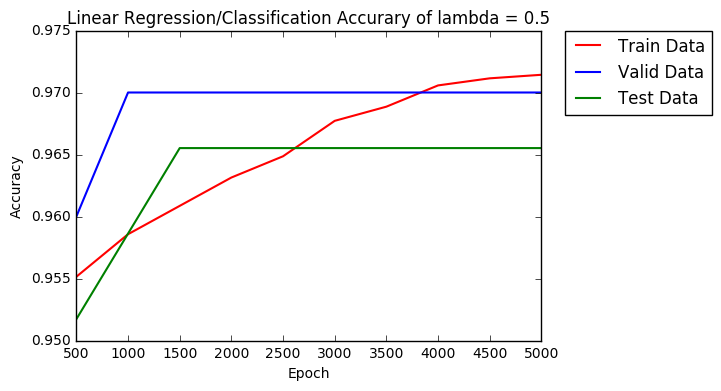

In [44]:
lossType = "MSE"
print("learning lambda = 0.5")

trainError_set,validError_set,testError_set,trainAccuracy_set,validAccuracy_set,testAccuracy_set,training_time,epoch_set = grad_descent(W, b, trainData, trainTarget, alpha_generalization, epochs, reg3, error_tol,EPS, lossType)[2:]
    
    
fig = plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss/MSE")
plt.plot(epoch_set,trainError_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validError_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testError_set,color='green', linewidth=1.5,label="Test Data")
    
plt.title('Linear Regression/Loss of '+"lambda = 0.5") 
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
    
fig = plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="Train Data")
plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="Valid Data")
plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="Test Data")

plt.title('Linear Regression/Classification Accurary of '+ "lambda = 0.5")
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

# 5. Comparing Batch GD with normal equation

In [45]:
def normal_equation(x, y):
    start_time = time.time()
    w_1 = np.linalg.inv(np.dot(x.T, x))
    w_2 = np.dot(w_1,x.T) 
    w_star = np.dot(w_2,y)
    training_time = time.time()-start_time
    
    return w_star,training_time

In [46]:
def normal_equation_MSE(x, y, b):
    w_star = normal_equation(x, y)[0]
    error = MSE(w_star, b, x, y, reg)
    return error

In [47]:
def normal_equation_Accuracy(x, y):
    w_star = normal_equation(x, y)[0]    
    y_hat = np.dot(x,w_star) + b
    n = 0
    
    for i in range(len(y_hat)):
        if 0.5 < y_hat[i] <= 1.5:
            y_hat[i] = 1
        elif -0.5 < y_hat[i] <=0.5:
            y_hat[i] = 0
        else:
            y_hat[i] = -100
        
        if y_hat[i] == y[i]:
            n = n + 1
            
    accuracy = n/len(y)
    
    return accuracy

In [48]:
# compare final training MSE
#traning_MSE of normal equation
lossType1= "MSE"
print('1. compare final training MSE:')
print("traning_MSE of normal equation: %.4f" %(normal_equation_MSE(trainData, trainTarget,b)))
print("traning_MSE of GD: %.4f" %(grad_descent(W,b, trainData, trainTarget, alpha_generalization, epochs, reg, error_tol, EPS, lossType1)[2][-1]))



print('2. compare final training Accuracy:')
print("traning_Acuracy of normal equation: %.4f" %(normal_equation_Accuracy(trainData, trainTarget)))
print("traning_Accuracy of GD: %.4f" %(grad_descent(W,b, trainData, trainTarget, alpha_generalization, epochs, reg, error_tol,EPS, lossType1)[3][-1]))

#print('3. compare Computation time:%.4f')
#print('Computation_Time of normal equation:%.4f'%(normal_equation(x, y, b,reg)[1]))

1. compare final training MSE:
traning_MSE of normal equation: 0.0116
Iteration: 500 - TrainError: 0.0188 - TrainAccuracy: 0.9591
Iteration: 500 - ValidError: 0.0210 - ValidAccuracy: 0.9700
Iteration: 500 - TestError: 0.0209 - TestAccuracy: 0.9586
TrainingTime: 0.9811
Iteration: 1000 - TrainError: 0.0172 - TrainAccuracy: 0.9631
Iteration: 1000 - ValidError: 0.0193 - ValidAccuracy: 0.9700
Iteration: 1000 - TestError: 0.0196 - TestAccuracy: 0.9586
TrainingTime: 1.9603
Iteration: 1500 - TrainError: 0.0162 - TrainAccuracy: 0.9657
Iteration: 1500 - ValidError: 0.0182 - ValidAccuracy: 0.9700
Iteration: 1500 - TestError: 0.0188 - TestAccuracy: 0.9586
TrainingTime: 2.9426
Iteration: 2000 - TrainError: 0.0155 - TrainAccuracy: 0.9686
Iteration: 2000 - ValidError: 0.0175 - ValidAccuracy: 0.9800
Iteration: 2000 - TestError: 0.0183 - TestAccuracy: 0.9586
TrainingTime: 3.9236
Iteration: 2500 - TrainError: 0.0150 - TrainAccuracy: 0.9714
Iteration: 2500 - ValidError: 0.0170 - ValidAccuracy: 0.9800
Ite

# 2 Logistic Regression

# 2.1 Binary cross-entropy loss

# 1) Loss Function and Gradient

In [49]:
def sigmoid(z):
    pred_z = 1. / (1. + np.exp((-1)*z))
    pred_z = np.clip(pred_z, EPS, 1. - EPS)
    return pred_z

In [50]:
def crossEntropyLoss(W, b, x, y, reg, EPS):
    n_traning_samples = len(y)
    y_hat = np.dot(x,W)+b
    pred_y = sigmoid(y_hat)
    loss = 1/n_traning_samples*(np.sum((-1)*y*np.log(pred_y)-(1-y)*np.log(1-pred_y)))+np.sum(np.square(W))*reg/2
    #loss = 1/n_traning_samples*(np.sum(y*np.log(1.0/pred_y)+(1-y)*np.log(1.0/(1-pred_y))))+np.sum(np.square(W))*reg/2
    
    return loss

In [51]:
def gradCE(W, b, x, y, reg):
    n_traning_samples = len(y)
    y_hat = np.dot(x,W)+b
    gradCE_w = (1.0/n_traning_samples)*(np.dot(x.T,(-1)*y*sigmoid((-1)*y_hat))+np.dot(x.T,(1-y)*sigmoid(y_hat)))+reg*W
    gradCE_b = (1.0/n_traning_samples)*np.sum((-1)*y*sigmoid((-1)*y_hat)+(1-y)*sigmoid(y_hat))
    return gradCE_w,gradCE_b

# 2). Learning

In [108]:
def plot_loss_accuracy_CE(W, b, x, y, alpha_logistic, epochs, reg_logistic, EPS, title,error_tol):
    
    lossType = "CE"
    
    print("learning rate = 0.005")
    train_error,train_accuracy,epoch_set = grad_descent(W, b, x, y, alpha_logistic, epochs, reg_logistic, error_tol,EPS, lossType)[2:]

    fig = plt.figure()

    plt.xlabel("Epoch")
    plt.ylabel("Loss/MSE")
    plt.plot(epoch_set,train_error,color='red', linewidth=1.5,label="alpha1=0.005")
    
    plt.title('Logistic Regression/Loss of '+ title) 
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()
    
    fig = plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(epoch_set,train_accuracy,color='red', linewidth=1.5,label="alpha1=0.005")

    plt.title('Logistic Regression/Classification Accuracy of '+ title)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    
    plt.show()

learning rate = 0.005
Iteracion: 500 - Error: 0.1206 - Accuracy: 0.9706
Iteracion: 1000 - Error: 0.1163 - Accuracy: 0.9726
Iteracion: 1500 - Error: 0.1153 - Accuracy: 0.9746
Iteracion: 2000 - Error: 0.1149 - Accuracy: 0.9749
Iteracion: 2500 - Error: 0.1148 - Accuracy: 0.9757
Iteracion: 3000 - Error: 0.1147 - Accuracy: 0.9760
Iteracion: 3500 - Error: 0.1146 - Accuracy: 0.9763
Iteracion: 4000 - Error: 0.1146 - Accuracy: 0.9763
Iteracion: 4500 - Error: 0.1146 - Accuracy: 0.9763
Iteracion: 5000 - Error: 0.1145 - Accuracy: 0.9763
[0.1206260572099154, 0.11628950414133214, 0.11531570305979538, 0.11494355405129764, 0.11476762434625044, 0.11467348715003231, 0.11461719703682131, 0.11457950844336402, 0.11455143418329289, 0.11452860189689885]


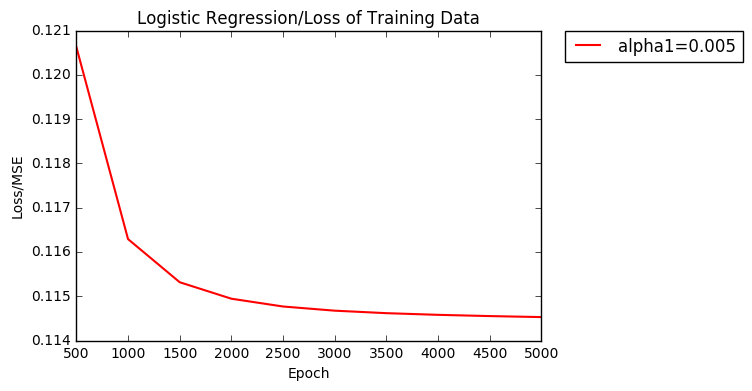

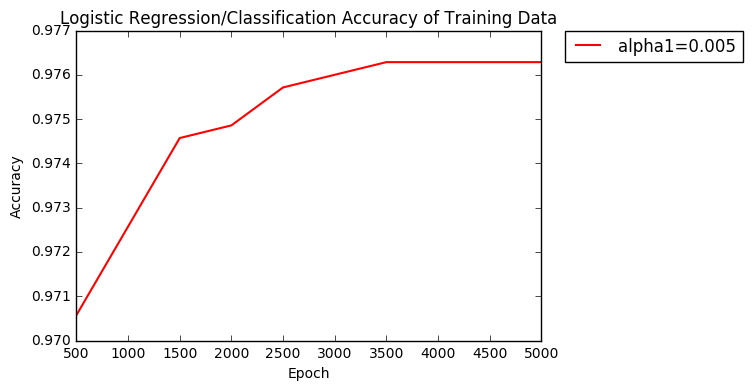

In [109]:
W = np.zeros([28*28,  1])
b = 0
reg = 0
epochs = 5000
reg_logistic = 0.1
alpha_logistic = 0.005
EPS_SGD = 10**-7
title = 'Training Data'
error_tol = 10**-7

# trainging data
plot_loss_accuracy_CE(W,b, trainData, trainTarget, alpha_logistic, epochs, reg_logistic, EPS_SGD, title,error_tol)

# 3). Comparison to Linear Regression

In [117]:
alpha_compare = 0.005 
epochs_compare = 5000
reg_compare = 0

def plot_compare_regression(W, b, x, y, alpha_compare, epochs_compare, reg_compare, EPS, title,error_tol):
    
    lossType_linear = "MSE"
    train_error_linear,train_accurary_linear,training_time_linear,epoch_set_linear = grad_descent(W, b, x, y, alpha_compare, epochs_compare, reg_compare, error_tol,EPS,lossType_linear)[2:]  
    lossType_logistic = "CE"
    train_error_logistic,train_accuracy_logistic,epoch_set_logistic = grad_descent(W, b, x, y, alpha_compare, epochs_compare, reg_compare, error_tol,EPS,lossType_logistic)[2:]
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss/MSE")
    plt.plot(epoch_set_linear,train_error_linear,color='red', linewidth=1.5,label="linear regression")
    plt.plot(epoch_set_logistic,train_error_logistic,color='blue', linewidth=1.5,label="logistic regression")
    
    plt.title('Compare Linear and Logistic Regression') 
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()
    
    

Iteration: 500 - Error: 0.0188 - Accuracy: 0.9591
Iteration: 1000 - Error: 0.0172 - Accuracy: 0.9631
Iteration: 1500 - Error: 0.0162 - Accuracy: 0.9657
Iteration: 2000 - Error: 0.0155 - Accuracy: 0.9686
Iteration: 2500 - Error: 0.0150 - Accuracy: 0.9714
Iteration: 3000 - Error: 0.0146 - Accuracy: 0.9740
Iteration: 3500 - Error: 0.0143 - Accuracy: 0.9746
Iteration: 4000 - Error: 0.0141 - Accuracy: 0.9771
Iteration: 4500 - Error: 0.0138 - Accuracy: 0.9780
Iteration: 5000 - Error: 0.0137 - Accuracy: 0.9789
Iteracion: 500 - Error: 0.0873 - Accuracy: 0.9711
Iteracion: 1000 - Error: 0.0733 - Accuracy: 0.9751
Iteracion: 1500 - Error: 0.0673 - Accuracy: 0.9769
Iteracion: 2000 - Error: 0.0637 - Accuracy: 0.9766
Iteracion: 2500 - Error: 0.0612 - Accuracy: 0.9777
Iteracion: 3000 - Error: 0.0593 - Accuracy: 0.9789
Iteracion: 3500 - Error: 0.0578 - Accuracy: 0.9797
Iteracion: 4000 - Error: 0.0565 - Accuracy: 0.9809
Iteracion: 4500 - Error: 0.0554 - Accuracy: 0.9806
Iteracion: 5000 - Error: 0.0544 -

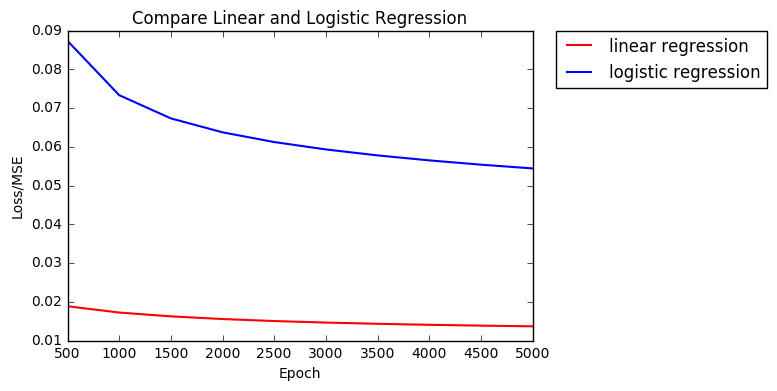

In [119]:
plot_compare_regression(W, b, trainData, trainTarget, alpha_compare, epochs_compare, reg_compare, EPS, title,error_tol)

# 3 Batch Gradient Descent vs. SGD and Adam

# 3.1 SGD

# 1) Building the Computational Graph

In [147]:
import tensorflow as tf

In [148]:
def buildGraph(alpha,lossType=None,optimizerType=None): 
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    #(a)Initialize weight and bias tensors
    #W = tf.truncated_normal(shape=[trainData.shape[1], 1],stddev=0.5,name="weight")
    
    #b = tf.Variable(tf.random_uniform([1,1]), name="bias")
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.05, shape=[1]))
    
    #(b)Initialize placeholders , data ,label, regularition
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    #(d) The optimizer
    if lossType == "MSE":
        print("MSE")
        loss = tf.reduce_mean(tf.square(y_hat-y))/2 + reg * tf.nn.l2_loss(W)
        # Gradient descent
        # Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
        if optimizerType == "GD":
            print("GD")
            # Gradient descent
            optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss,name='GradientDescentOptimizer')
        elif optimizerType == "Adam":
            print("Adam")
            optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(loss, name='AdamOptimizer')
            
        
    elif lossType == "CE":
        print("CE")
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y)) + reg * tf.nn.l2_loss(W)
        if optimizerType == "GD":
            print("GD")
            # Gradient descent
            optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss,name='GradientDescentOptimizer')
        elif optimizerType == "Adam":
            print("Adam")
            optimizer = tf.train.AdamOptimizer(learning_rate = alpha).minimize(loss, name='AdamOptimizer')

    return W,b,X,y,y_hat,loss,reg,optimizer

# Linear Regression

# 2) Implementing Stochastic Gradient Descent

In [154]:
def SGD(epochs,lossType,alpha,batch_size,reg_SGD,title,optimizerType):
    
    # tranining data
    trainTarget = loadData()[3]
    n_train = len(trainTarget)
    trainData = np.reshape(loadData()[0], [n_train, -1])

    # validation data
    validTarget = loadData()[4]
    n_valid = len(validTarget)
    validData = np.reshape(loadData()[1], [n_valid, -1])

    # test data
    testTarget = loadData()[5]
    n_test = len(testTarget)
    testData = np.reshape(loadData()[2], [n_test, -1])

    # get parameters from tensor graph
    W,b,X,y,y_hat,loss,reg,optimizer = buildGraph(alpha,lossType,optimizerType)
    
    # Initialize
    init = tf.global_variables_initializer()
    
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainLoss_set  = []
        validLoss_set  = []
        testLoss_set  = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                # Compute current loss
                trainCurrent_loss = sess.run(loss,feed_dict={X:trainData, y:trainTarget,reg: reg_SGD})
                validCurrent_loss = sess.run(loss,feed_dict={X:validData, y:validTarget,reg: reg_SGD})
                testCurrent_loss = sess.run(loss,feed_dict={X:testData, y:testTarget,reg: reg_SGD})
            
                print("Epoch =", epoch, "trainLoss =", "{:.4f}".format(trainCurrent_loss),
                "validLoss =", "{:.4f}".format(validCurrent_loss),"testLoss =", "{:.4f}".format(testCurrent_loss))
            
            
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
                
                # Update the coordinates
                epoch_set.append(epoch)
            
                trainLoss_set.append(trainCurrent_loss)
                validLoss_set.append(validCurrent_loss)
                testLoss_set.append(testCurrent_loss)
            
                trainAccuracy_set.append(trainAccuracy)
                validAccuracy_set.append(validAccuracy)
                testAccuracy_set.append(testAccuracy)
        
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        
        # compute final loss
        print("Final Loss")
        trainFinal_loss = sess.run(loss,feed_dict={X:trainData, y:trainTarget,reg: reg_SGD})
        validFinal_loss = sess.run(loss,feed_dict={X:validData, y:validTarget,reg: reg_SGD})
        testFinal_loss = sess.run(loss,feed_dict={X:testData, y:testTarget,reg: reg_SGD})
        print("trainFinalLoss =", "{:.4f}".format(trainFinal_loss),
                "validFinalLoss =", "{:.4f}".format(validFinal_loss),
               "testFinalLoss =", "{:.4f}".format(testFinal_loss))
            

    # loss curve   
    fig = plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Loss/MSE")

    plt.plot(epoch_set,trainLoss_set,color='red', linewidth=1.5,label="training data")
    plt.plot(epoch_set,validLoss_set,color='blue', linewidth=1.5,label="validation data")
    plt.plot(epoch_set,testLoss_set,color='green', linewidth=1.5,label="testing data")

    plt.title(title+'/Loss')
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()

    # accuracy curve
    fig = plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy/percent")

    plt.plot(epoch_set,trainAccuracy_set,color='red', linewidth=1.5,label="training data")
    plt.plot(epoch_set,validAccuracy_set,color='blue', linewidth=1.5,label="validation data")
    plt.plot(epoch_set,testAccuracy_set,color='green', linewidth=1.5,label="testing data")

    plt.title(title+'/Loss')
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()

MSE
GD
Epoch = 100 trainLoss = 0.0374 validLoss = 0.0480 testLoss = 0.0367
trainAccuracy = 93.0000 validAccuracy = 88.0000 testAccuracy = 93.1034
Epoch = 200 trainLoss = 0.0327 validLoss = 0.0429 testLoss = 0.0329
trainAccuracy = 93.8571 validAccuracy = 92.0000 testAccuracy = 93.1034
Epoch = 300 trainLoss = 0.0299 validLoss = 0.0395 testLoss = 0.0309
trainAccuracy = 94.4000 validAccuracy = 92.0000 testAccuracy = 93.7931
Epoch = 400 trainLoss = 0.0279 validLoss = 0.0370 testLoss = 0.0294
trainAccuracy = 94.6857 validAccuracy = 93.0000 testAccuracy = 93.7931
Epoch = 500 trainLoss = 0.0263 validLoss = 0.0350 testLoss = 0.0284
trainAccuracy = 94.9714 validAccuracy = 93.0000 testAccuracy = 94.4828
Epoch = 600 trainLoss = 0.0251 validLoss = 0.0335 testLoss = 0.0275
trainAccuracy = 95.1714 validAccuracy = 94.0000 testAccuracy = 94.4828
Epoch = 700 trainLoss = 0.0240 validLoss = 0.0321 testLoss = 0.0268
trainAccuracy = 95.4000 validAccuracy = 94.0000 testAccuracy = 94.4828
Final Loss
trainFina

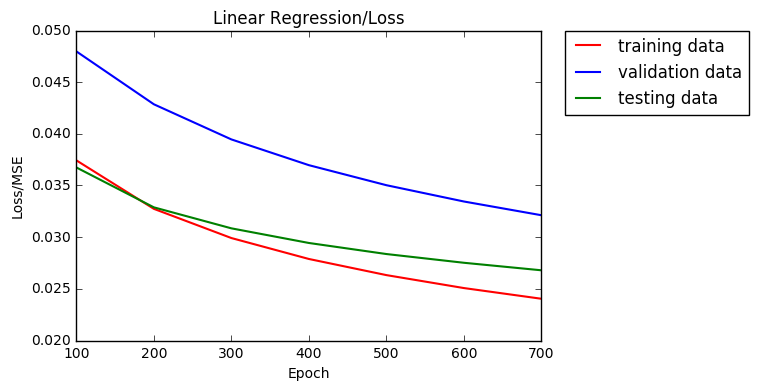

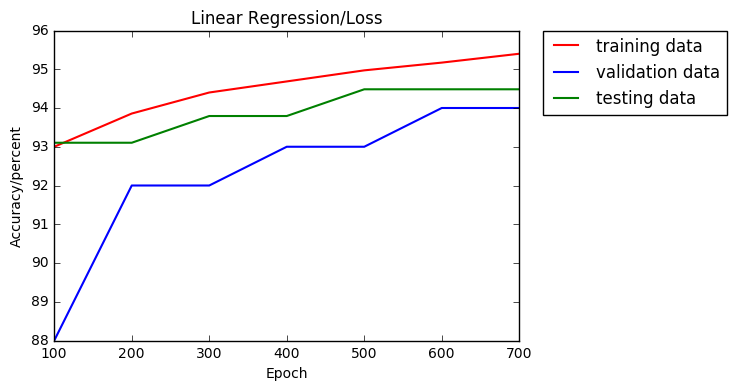

In [155]:
epochs = 700
lossType = "MSE"
alpha = 0.001
batch_size = 500
title = "Linear Regression"
optimizerType = "GD"
reg_SGD = 0

SGD(epochs,lossType,alpha,batch_size,reg_SGD,title,optimizerType)

# 3) Batch Size Investigation

batch size =  100
MSE
Adam
Epoch = 100 trainLoss = 0.0121 validLoss = 0.0171 testLoss = 0.0223
trainAccuracy = 98.7143 validAccuracy = 97.0000 testAccuracy = 95.1724
Epoch = 200 trainLoss = 0.0133 validLoss = 0.0211 testLoss = 0.0263
trainAccuracy = 98.9429 validAccuracy = 96.0000 testAccuracy = 96.5517
Epoch = 300 trainLoss = 0.0106 validLoss = 0.0188 testLoss = 0.0227
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 400 trainLoss = 0.0110 validLoss = 0.0201 testLoss = 0.0233
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 95.8621
Epoch = 500 trainLoss = 0.0106 validLoss = 0.0199 testLoss = 0.0238
trainAccuracy = 99.1429 validAccuracy = 97.0000 testAccuracy = 95.8621
Epoch = 600 trainLoss = 0.0102 validLoss = 0.0206 testLoss = 0.0257
trainAccuracy = 99.1429 validAccuracy = 96.0000 testAccuracy = 95.1724
Epoch = 700 trainLoss = 0.0104 validLoss = 0.0199 testLoss = 0.0253
trainAccuracy = 99.2000 validAccuracy = 97.0000 testAccuracy = 95.1724


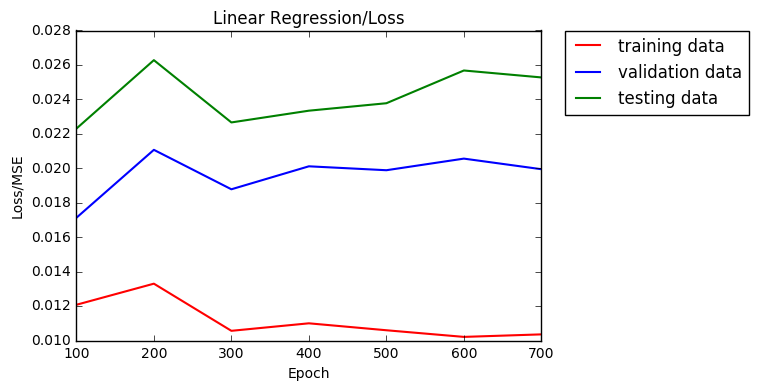

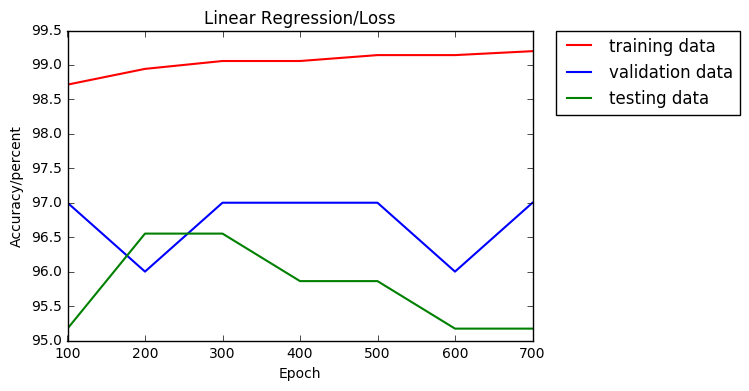

batch size =  700
MSE
Adam
Epoch = 100 trainLoss = 0.0149 validLoss = 0.0143 testLoss = 0.0203
trainAccuracy = 97.6286 validAccuracy = 99.0000 testAccuracy = 95.8621
Epoch = 200 trainLoss = 0.0127 validLoss = 0.0137 testLoss = 0.0195
trainAccuracy = 98.3429 validAccuracy = 100.0000 testAccuracy = 97.9310
Epoch = 300 trainLoss = 0.0121 validLoss = 0.0144 testLoss = 0.0194
trainAccuracy = 98.5143 validAccuracy = 98.0000 testAccuracy = 97.9310
Epoch = 400 trainLoss = 0.0119 validLoss = 0.0154 testLoss = 0.0201
trainAccuracy = 98.6286 validAccuracy = 98.0000 testAccuracy = 97.2414
Epoch = 500 trainLoss = 0.0112 validLoss = 0.0155 testLoss = 0.0203
trainAccuracy = 98.7143 validAccuracy = 98.0000 testAccuracy = 96.5517
Epoch = 600 trainLoss = 0.0109 validLoss = 0.0158 testLoss = 0.0205
trainAccuracy = 98.8000 validAccuracy = 98.0000 testAccuracy = 96.5517
Epoch = 700 trainLoss = 0.0108 validLoss = 0.0162 testLoss = 0.0210
trainAccuracy = 98.8571 validAccuracy = 98.0000 testAccuracy = 96.5517

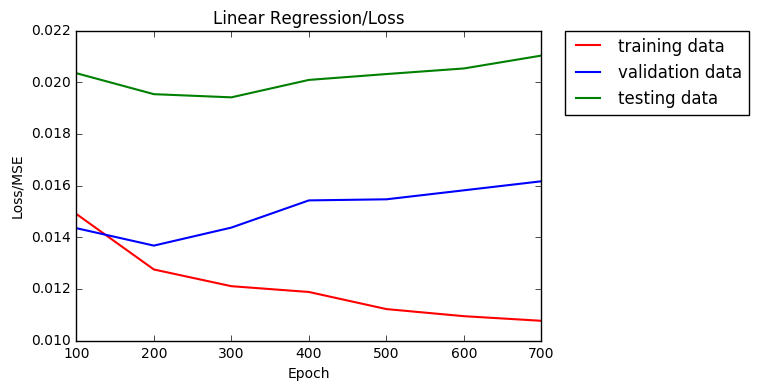

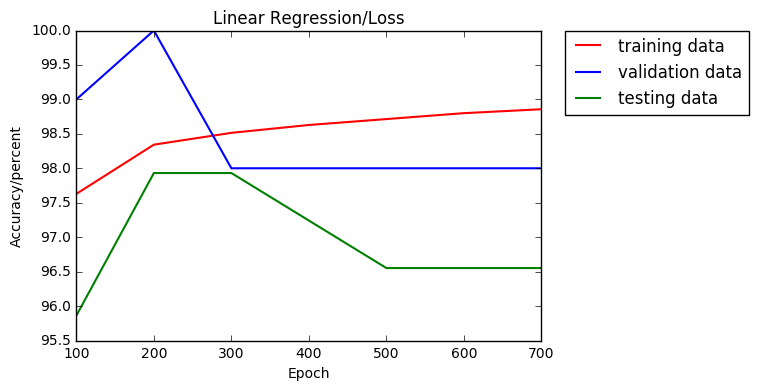

batch size =  1750
MSE
Adam
Epoch = 100 trainLoss = 0.0194 validLoss = 0.0223 testLoss = 0.0266
trainAccuracy = 96.3143 validAccuracy = 95.0000 testAccuracy = 93.7931
Epoch = 200 trainLoss = 0.0152 validLoss = 0.0191 testLoss = 0.0232
trainAccuracy = 97.5714 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 300 trainLoss = 0.0135 validLoss = 0.0173 testLoss = 0.0216
trainAccuracy = 97.9143 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 400 trainLoss = 0.0127 validLoss = 0.0172 testLoss = 0.0217
trainAccuracy = 98.1714 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 500 trainLoss = 0.0124 validLoss = 0.0170 testLoss = 0.0214
trainAccuracy = 98.2000 validAccuracy = 97.0000 testAccuracy = 95.8621
Epoch = 600 trainLoss = 0.0119 validLoss = 0.0171 testLoss = 0.0218
trainAccuracy = 98.6857 validAccuracy = 98.0000 testAccuracy = 95.8621
Epoch = 700 trainLoss = 0.0116 validLoss = 0.0169 testLoss = 0.0215
trainAccuracy = 98.6571 validAccuracy = 98.0000 testAccuracy = 95.8621

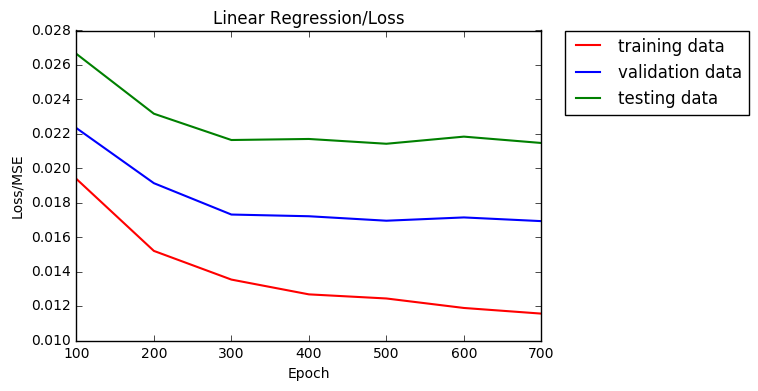

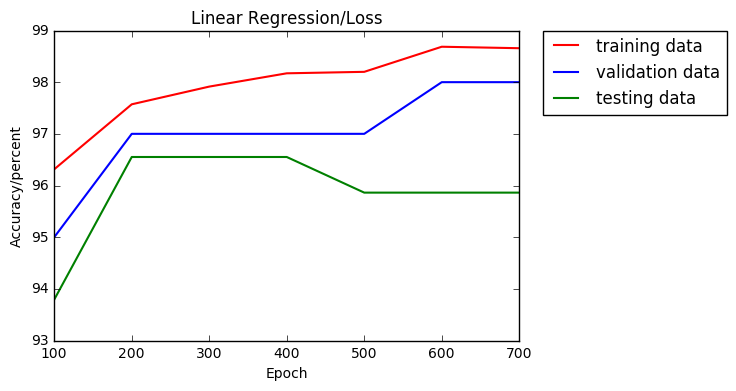

In [157]:
epochs = 700
lossType = "MSE"
alpha = 0.001
batch_size = [100,700,1750]
reg = 0
title = "Linear Regression"
optimizerType = "Adam"

for size in batch_size:
    size = int(size)
    print("batch size = ", size)
    SGD(epochs,lossType,alpha,size,reg,title,optimizerType)

# 4）Hyperparameter Investigation

# beta1=[0.95,0.99]

In [168]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

beta1=[0.95,0.99]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for beta in beta1:
    print("beta1 =", "{:.2f}".format(beta))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.05, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.square(y_hat-y))/2 + reg * tf.nn.l2_loss(W)
        
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,beta1=beta).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        



beta1 = 0.95
trainAccuracy = 98.2000 validAccuracy = 98.0000 testAccuracy = 95.8621
trainAccuracy = 98.3714 validAccuracy = 98.0000 testAccuracy = 96.5517
trainAccuracy = 98.6571 validAccuracy = 99.0000 testAccuracy = 96.5517
trainAccuracy = 98.8000 validAccuracy = 98.0000 testAccuracy = 95.1724
trainAccuracy = 98.8571 validAccuracy = 98.0000 testAccuracy = 95.1724
trainAccuracy = 98.9143 validAccuracy = 97.0000 testAccuracy = 95.1724
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 95.1724
beta1 = 0.99
trainAccuracy = 96.2571 validAccuracy = 96.0000 testAccuracy = 94.4828
trainAccuracy = 97.3429 validAccuracy = 98.0000 testAccuracy = 96.5517
trainAccuracy = 98.1714 validAccuracy = 98.0000 testAccuracy = 97.2414
trainAccuracy = 98.4857 validAccuracy = 98.0000 testAccuracy = 97.2414
trainAccuracy = 98.6286 validAccuracy = 98.0000 testAccuracy = 96.5517
trainAccuracy = 98.7429 validAccuracy = 97.0000 testAccuracy = 95.1724
trainAccuracy = 98.8286 validAccuracy = 97.0000 tes

# beta2=[0.99,0.9999]

In [169]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

beta2=[0.99,0.9999]
#epsilon = [1e**-9,1e**-4]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for beta in beta2:
    print("beta2 =", "{:.4f}".format(beta))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.00, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.square(y_hat-y))/2 + reg * tf.nn.l2_loss(W)
        
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,beta2=beta).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        

beta2 = 0.9900
trainAccuracy = 98.2286 validAccuracy = 98.0000 testAccuracy = 97.2414
trainAccuracy = 98.4857 validAccuracy = 98.0000 testAccuracy = 97.9310
trainAccuracy = 98.8286 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.8571 validAccuracy = 96.0000 testAccuracy = 97.9310
trainAccuracy = 98.8000 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.9429 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 99.0286 validAccuracy = 96.0000 testAccuracy = 97.2414
beta2 = 0.9999
trainAccuracy = 97.8571 validAccuracy = 99.0000 testAccuracy = 95.8621
trainAccuracy = 98.3429 validAccuracy = 99.0000 testAccuracy = 97.2414
trainAccuracy = 98.6857 validAccuracy = 99.0000 testAccuracy = 96.5517
trainAccuracy = 98.7143 validAccuracy = 98.0000 testAccuracy = 95.8621
trainAccuracy = 98.8286 validAccuracy = 98.0000 testAccuracy = 95.8621
trainAccuracy = 98.8571 validAccuracy = 98.0000 testAccuracy = 95.8621
trainAccuracy = 98.9429 validAccuracy = 98.0000

# epsilon = [1e**-9,1e**-4]

In [170]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

epsilons = [10**-9,10**-4]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for epsilon in epsilons:
    print("epsilon =", "{}".format(epsilon))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.00, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.square(y_hat-y))/2 + reg * tf.nn.l2_loss(W)
        
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,epsilon=epsilon).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        

epsilon = 1e-09
trainAccuracy = 97.7714 validAccuracy = 98.0000 testAccuracy = 97.2414
trainAccuracy = 98.3429 validAccuracy = 97.0000 testAccuracy = 97.9310
trainAccuracy = 98.5714 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.7714 validAccuracy = 97.0000 testAccuracy = 96.5517
trainAccuracy = 98.8000 validAccuracy = 97.0000 testAccuracy = 95.8621
trainAccuracy = 98.9429 validAccuracy = 97.0000 testAccuracy = 95.8621
trainAccuracy = 98.9429 validAccuracy = 97.0000 testAccuracy = 95.8621
epsilon = 0.0001
trainAccuracy = 96.8571 validAccuracy = 99.0000 testAccuracy = 96.5517
trainAccuracy = 98.0571 validAccuracy = 99.0000 testAccuracy = 97.2414
trainAccuracy = 98.4857 validAccuracy = 99.0000 testAccuracy = 97.2414
trainAccuracy = 98.7429 validAccuracy = 99.0000 testAccuracy = 95.8621
trainAccuracy = 98.7143 validAccuracy = 98.0000 testAccuracy = 96.5517
trainAccuracy = 98.8857 validAccuracy = 97.0000 testAccuracy = 95.8621
trainAccuracy = 98.9714 validAccuracy = 97.0

# Logistic Regression

# 5) Cross Entropy Loss Investigation

# * Implementing Stochastic Gradient Descent

CE
GD
Epoch = 100 trainLoss = 0.1449 validLoss = 0.1623 testLoss = 0.1431
trainAccuracy = 95.7143 validAccuracy = 97.0000 testAccuracy = 95.1724
Epoch = 200 trainLoss = 0.1098 validLoss = 0.1252 testLoss = 0.1113
trainAccuracy = 96.2571 validAccuracy = 97.0000 testAccuracy = 95.1724
Epoch = 300 trainLoss = 0.0957 validLoss = 0.1101 testLoss = 0.0996
trainAccuracy = 96.6571 validAccuracy = 97.0000 testAccuracy = 95.8621
Epoch = 400 trainLoss = 0.0876 validLoss = 0.1015 testLoss = 0.0936
trainAccuracy = 96.8286 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 500 trainLoss = 0.0823 validLoss = 0.0957 testLoss = 0.0900
trainAccuracy = 97.0286 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 600 trainLoss = 0.0785 validLoss = 0.0915 testLoss = 0.0877
trainAccuracy = 97.1429 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 700 trainLoss = 0.0755 validLoss = 0.0883 testLoss = 0.0861
trainAccuracy = 97.2857 validAccuracy = 97.0000 testAccuracy = 97.2414
Final Loss
trainFinal

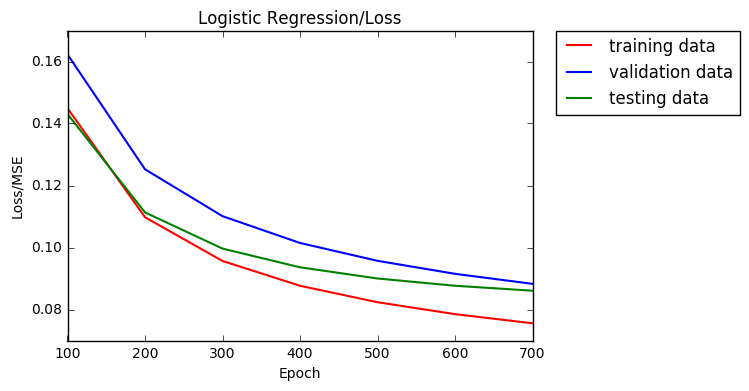

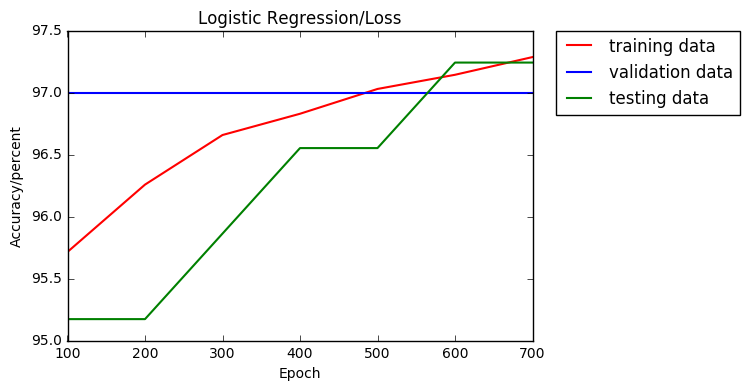

In [171]:
epochs = 700
lossType = "CE"
alpha = 0.001
batch_size = 500
reg = 0
title = "Logistic Regression"
optimizerType = "GD"
SGD(epochs,lossType,alpha,batch_size,reg,title,optimizerType)

# * Batch Size Investigation

batch size =  100
CE
Adam
Epoch = 100 trainLoss = 0.0278 validLoss = 0.0497 testLoss = 0.1161
trainAccuracy = 99.0000 validAccuracy = 97.0000 testAccuracy = 97.9310
Epoch = 200 trainLoss = 0.0177 validLoss = 0.0580 testLoss = 0.1288
trainAccuracy = 99.4000 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 300 trainLoss = 0.0127 validLoss = 0.0654 testLoss = 0.1412
trainAccuracy = 99.7143 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 400 trainLoss = 0.0093 validLoss = 0.0720 testLoss = 0.1611
trainAccuracy = 99.7714 validAccuracy = 97.0000 testAccuracy = 97.9310
Epoch = 500 trainLoss = 0.0072 validLoss = 0.0768 testLoss = 0.1788
trainAccuracy = 99.8286 validAccuracy = 97.0000 testAccuracy = 97.9310
Epoch = 600 trainLoss = 0.0058 validLoss = 0.0833 testLoss = 0.1923
trainAccuracy = 99.9143 validAccuracy = 97.0000 testAccuracy = 96.5517
Epoch = 700 trainLoss = 0.0044 validLoss = 0.0895 testLoss = 0.2132
trainAccuracy = 99.9714 validAccuracy = 97.0000 testAccuracy = 97.2414
F

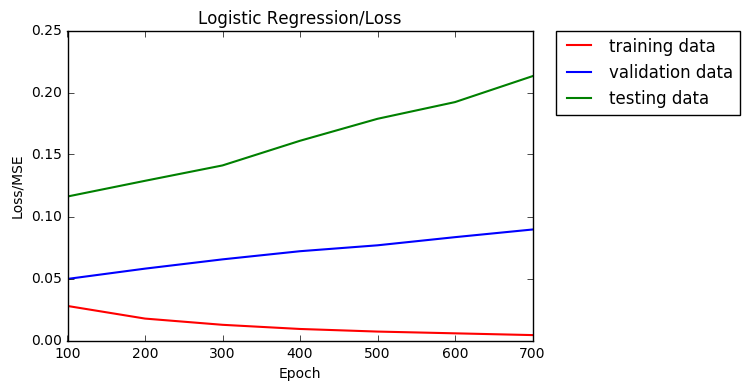

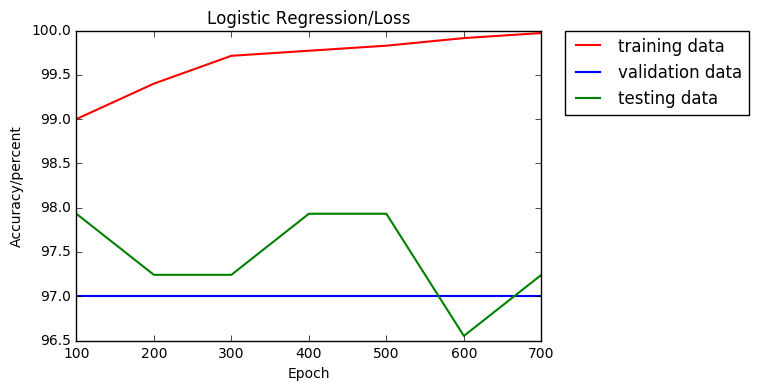

batch size =  700
CE
Adam
Epoch = 100 trainLoss = 0.0529 validLoss = 0.0580 testLoss = 0.0861
trainAccuracy = 98.0857 validAccuracy = 98.0000 testAccuracy = 96.5517
Epoch = 200 trainLoss = 0.0416 validLoss = 0.0470 testLoss = 0.0960
trainAccuracy = 98.2571 validAccuracy = 98.0000 testAccuracy = 97.2414
Epoch = 300 trainLoss = 0.0347 validLoss = 0.0445 testLoss = 0.1033
trainAccuracy = 98.5429 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 400 trainLoss = 0.0296 validLoss = 0.0449 testLoss = 0.1088
trainAccuracy = 98.8571 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 500 trainLoss = 0.0256 validLoss = 0.0464 testLoss = 0.1133
trainAccuracy = 98.9143 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 600 trainLoss = 0.0223 validLoss = 0.0487 testLoss = 0.1182
trainAccuracy = 99.0857 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 700 trainLoss = 0.0196 validLoss = 0.0513 testLoss = 0.1238
trainAccuracy = 99.3143 validAccuracy = 97.0000 testAccuracy = 97.2414
F

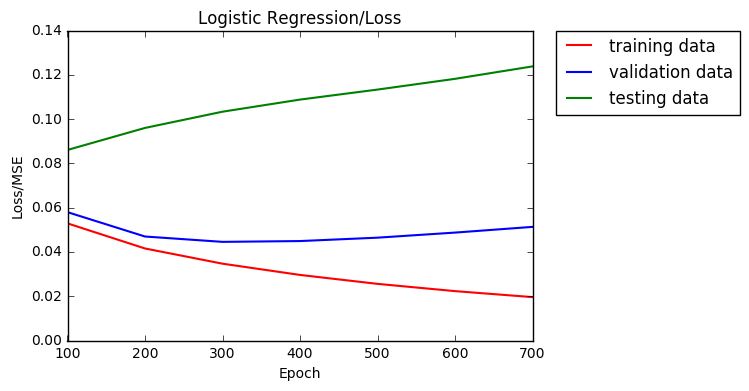

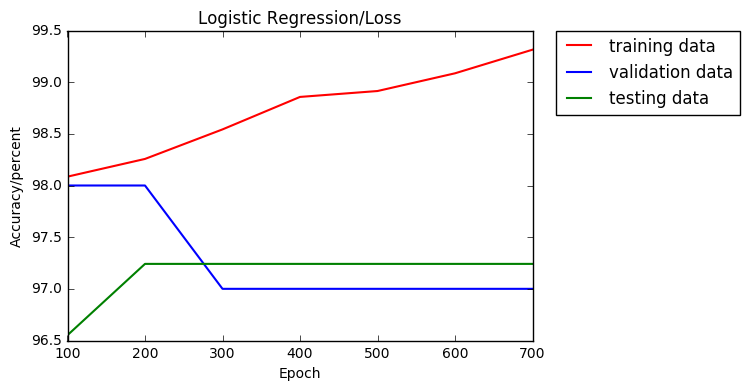

batch size =  1750
CE
Adam
Epoch = 100 trainLoss = 0.0691 validLoss = 0.0781 testLoss = 0.0902
trainAccuracy = 97.7429 validAccuracy = 99.0000 testAccuracy = 95.8621
Epoch = 200 trainLoss = 0.0565 validLoss = 0.0619 testLoss = 0.0907
trainAccuracy = 98.2000 validAccuracy = 98.0000 testAccuracy = 95.8621
Epoch = 300 trainLoss = 0.0499 validLoss = 0.0542 testLoss = 0.0939
trainAccuracy = 98.2857 validAccuracy = 98.0000 testAccuracy = 96.5517
Epoch = 400 trainLoss = 0.0452 validLoss = 0.0500 testLoss = 0.0967
trainAccuracy = 98.3143 validAccuracy = 98.0000 testAccuracy = 97.2414
Epoch = 500 trainLoss = 0.0413 validLoss = 0.0476 testLoss = 0.0998
trainAccuracy = 98.4571 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 600 trainLoss = 0.0381 validLoss = 0.0464 testLoss = 0.1024
trainAccuracy = 98.5143 validAccuracy = 97.0000 testAccuracy = 97.2414
Epoch = 700 trainLoss = 0.0352 validLoss = 0.0459 testLoss = 0.1053
trainAccuracy = 98.5429 validAccuracy = 97.0000 testAccuracy = 97.2414


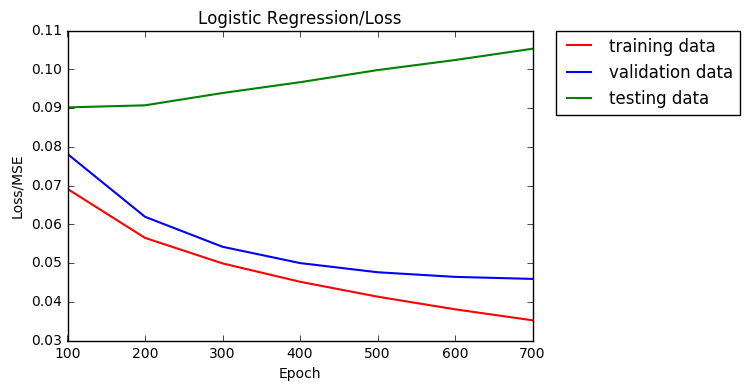

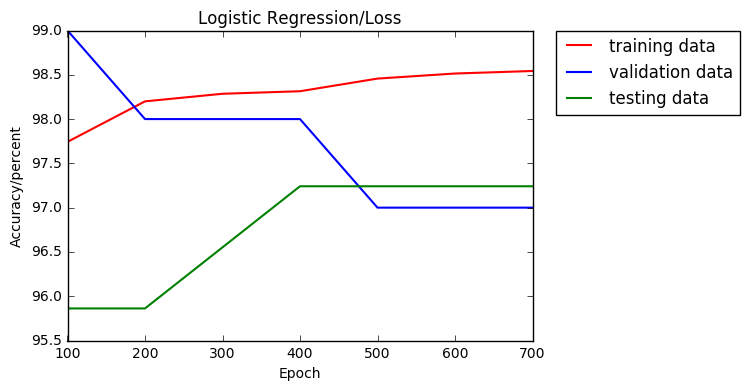

In [173]:
epochs = 700
lossType = "CE"
alpha = 0.001
batch_size = [100,700,1750]
reg = 0
title = "Logistic Regression"
optimizerType = "Adam"

for size in batch_size:
    size = int(size)
    print("batch size = ", size)
    SGD(epochs,lossType,alpha,size,reg,title,optimizerType)

# * Hyperparameter Investigation

# beta1=[0.95,0.99]

In [174]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

beta1=[0.95,0.99]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for beta in beta1:
    print("beta1 =", "{:.2f}".format(beta))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.05, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y)) + reg * tf.nn.l2_loss(W)
        
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,beta1=beta).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        



beta1 = 0.95
trainAccuracy = 98.3143 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.5143 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 98.9143 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.2571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.4000 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.6571 validAccuracy = 97.0000 testAccuracy = 97.2414
beta1 = 0.99
trainAccuracy = 98.3143 validAccuracy = 98.0000 testAccuracy = 97.2414
trainAccuracy = 98.4286 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.9143 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.0000 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 99.1714 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.4286 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.6286 validAccuracy = 97.0000 tes

# beta2=[0.99,0.9999]

In [175]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

beta2=[0.99,0.9999]
#epsilon = [1e**-9,1e**-4]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for beta in beta2:
    print("beta2 =", "{:.4f}".format(beta))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.00, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y)) + reg * tf.nn.l2_loss(W)
     
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,beta2=beta).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        

beta2 = 0.9900
trainAccuracy = 98.2571 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 98.9429 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 96.5517
trainAccuracy = 99.4286 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.6571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.7143 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.7714 validAccuracy = 97.0000 testAccuracy = 97.2414
beta2 = 0.9999
trainAccuracy = 98.3429 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 98.7429 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 98.9714 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.1714 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.2286 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.5143 validAccuracy = 97.0000

# epsilon = [1e-9,1e-4]

In [176]:
epochs = 700
alpha = 0.001
batch_size = 500
reg_SGD = 0

epsilons = [10**-9,10**-4]
#TensorFlow：learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.

for epsilon in epsilons:
    print("epsilon =", "{}".format(epsilon))
    n_training_samples = len(trainTarget)
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape = [trainData.shape[1], 1], stddev=0.05),name="weight")
    b = tf.Variable(tf.constant(0.00, shape=[1]))
    
    X = tf.placeholder(tf.float32, name="X")
    y = tf.placeholder(tf.float32, name="y")
    reg = tf.placeholder(tf.float32, name="reg")
    
    # Construct a linear model for predicted y(labels)
    y_hat = tf.add(tf.matmul(X, W), b)
    
    #(c) the loss sensor
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y)) + reg * tf.nn.l2_loss(W)
        
    #(d) The optimizer          
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001,epsilon=epsilon).minimize(loss, name='AdamOptimizer')

    # Initialize
    init = tf.global_variables_initializer()
    # the number of batches
    batch_count = int(np.floor(len(trainData)/batch_size))
    
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        
        # Initialize batch index
        batch_index = 0

        # Initialize plotting coordinates
        epoch_set = []
        
        trainAccuracy_set = []
        validAccuracy_set = []
        testAccuracy_set = []
        
        for epoch in range(epochs+1):
            
            for batch_index in range(batch_count):
                
                batch_X = trainData[batch_index*batch_size :(batch_index +1)*batch_size]
                batch_y = trainTarget[batch_index*batch_size :(batch_index +1)*batch_size] 
             
                ## Update model parameters
                sess.run(optimizer,feed_dict={X: batch_X,y: batch_y, reg: reg_SGD})
                     
                # Display logs per 100 epochs
            if epoch % 100 ==0 and epoch != 0:
                
                trainAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: trainData,y: trainTarget}) > 0.5)== trainTarget)
                validAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: validData,y: validTarget}) > 0.5)== validTarget)
                testAccuracy = 100*np.mean((y_hat.eval(feed_dict={X: testData,y: testTarget}) > 0.5)== testTarget)
                                       
                print("trainAccuracy =", "{:.4f}".format(trainAccuracy), 
                  "validAccuracy =", "{:.4f}".format(validAccuracy), 
                  "testAccuracy =", "{:.4f}".format(testAccuracy))
                
            # Shuffle the training set
            randIndx = np.arange(len(trainData))
            np.random.shuffle(randIndx)
            trainData, trainTarget = trainData[randIndx], trainTarget[randIndx]
        

epsilon = 1e-09
trainAccuracy = 98.2571 validAccuracy = 96.0000 testAccuracy = 97.9310
trainAccuracy = 98.7429 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 98.9429 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.2000 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.4571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.6286 validAccuracy = 97.0000 testAccuracy = 97.9310
epsilon = 0.0001
trainAccuracy = 98.2857 validAccuracy = 98.0000 testAccuracy = 96.5517
trainAccuracy = 98.5143 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 98.9714 validAccuracy = 96.0000 testAccuracy = 97.2414
trainAccuracy = 99.0571 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.1714 validAccuracy = 97.0000 testAccuracy = 97.2414
trainAccuracy = 99.4857 validAccuracy = 97.0000 testAccuracy = 97.9310
trainAccuracy = 99.5143 validAccuracy = 97.0

# 6） Comparison against Batch GD